In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('approved_data_2016_2018.csv', low_memory=False)

# Revert to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])

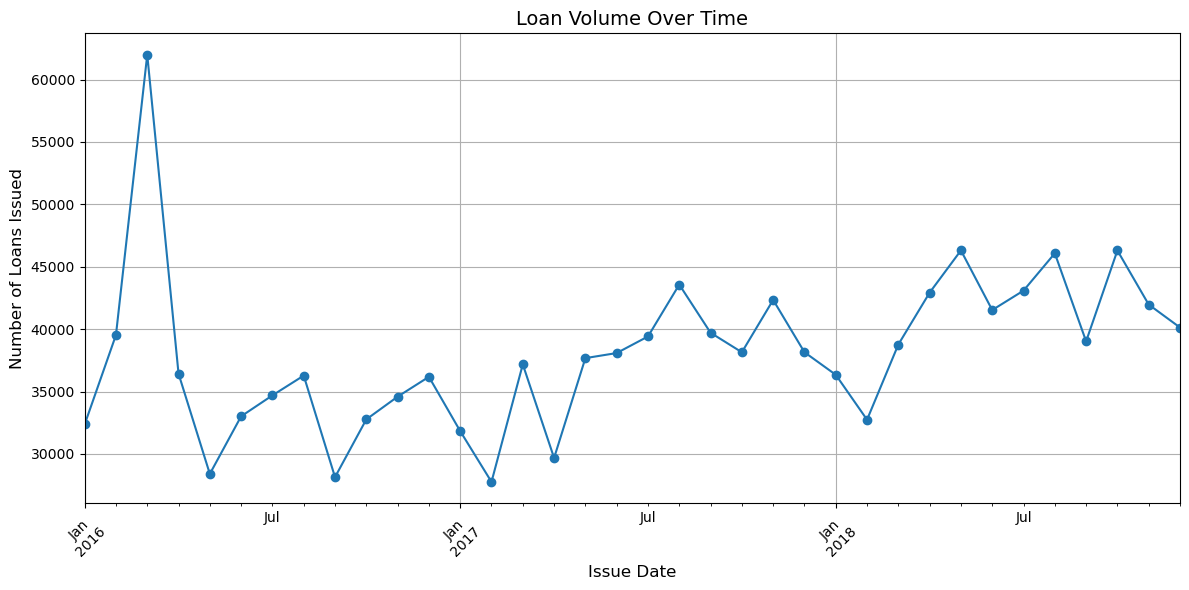

In [8]:
# Create loan volume over time
# group data by monthly period
loan_volume = df.groupby(df['issue_d'].dt.to_period('M')).size()

# plot loan volume
plt.figure(figsize=(12, 6))
loan_volume.plot(kind='line', marker='o')
plt.title('Loan Volume Over Time', fontsize=14)
plt.xlabel('Issue Date', fontsize=12)
plt.ylabel('Number of Loans Issued', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

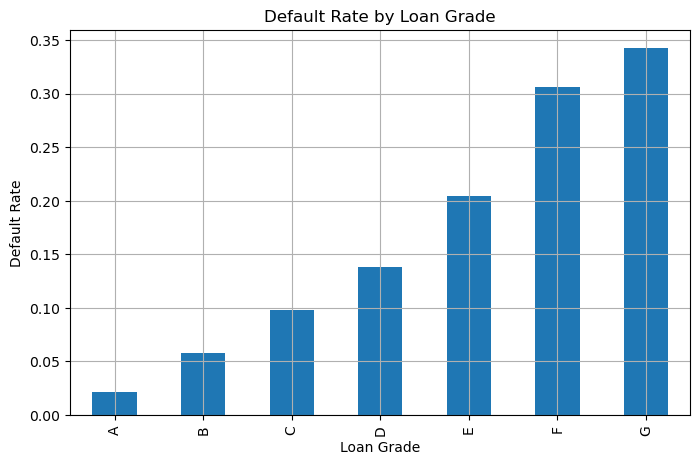

In [9]:
# Create a performance indicator (e.g., loan default status)
# 'loan_status' column has values 'Fully Paid', 'Charged Off', 'Current', and 'Late(31-120 days)'
df['is_defaulted'] = df['loan_status'].isin(['Charged Off']).astype(int)

# Group by grade and calculate default rate
grade_performance = df.groupby('grade')['is_defaulted'].mean()

# Plot default rate by grade
plt.figure(figsize=(8, 5))
grade_performance.plot(kind='bar')
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.grid(True)
plt.show()

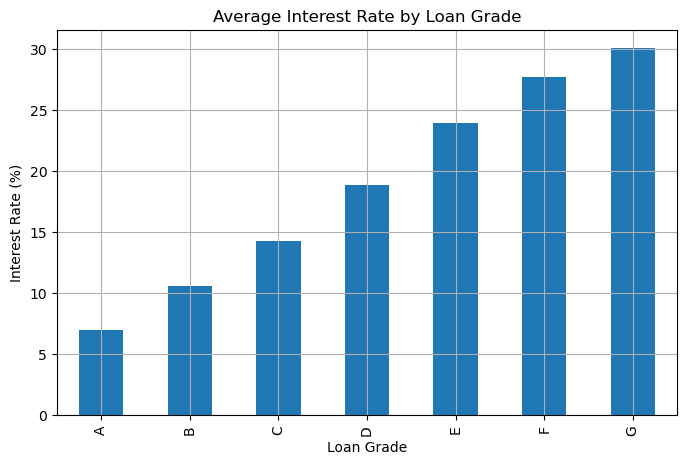

In [10]:
# Analyze average interest rates by grade
interest_by_grade = df.groupby('grade')['int_rate'].mean()

# Plot
plt.figure(figsize=(8, 5))
interest_by_grade.plot(kind='bar')
plt.title('Average Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Average DTI by Loan Grade'}, xlabel='grade'>

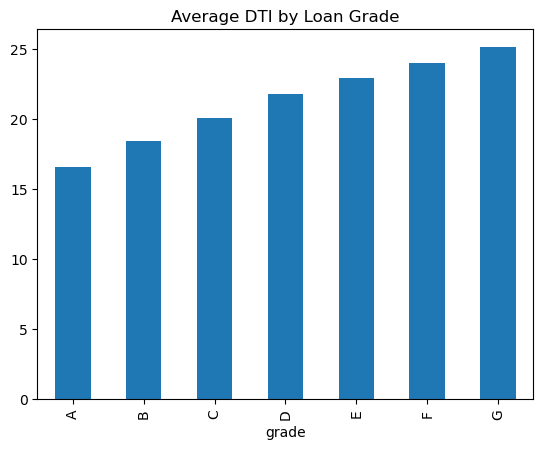

In [11]:
# Analyze average DTI by grade
dti_by_grade = df.groupby('grade')['dti'].mean()

# Plot
dti_by_grade.plot(kind='bar', title='Average DTI by Loan Grade')

<Axes: title={'center': 'Default Rate by Loan Purpose'}, xlabel='purpose'>

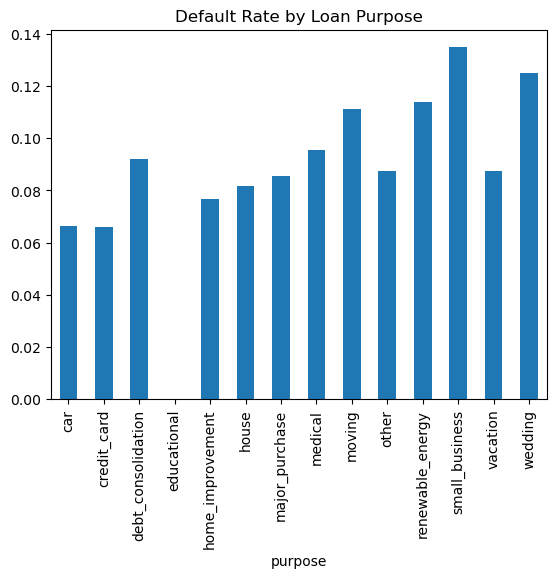

In [12]:
# Analyze loan purpose 
purpose = df.groupby('purpose')['is_defaulted'].mean()

# Plot
purpose.plot(kind='bar', title='Default Rate by Loan Purpose')